<a href="https://colab.research.google.com/github/Samirlamichhane10/sms_spam_classifier/blob/main/sms/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder




In [111]:
fileurl = '/content/drive/MyDrive/Colab Notebooks/spam.csv'
sms=pd.read_csv(fileurl, encoding='latin-1')


In [112]:
sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1156,ham,Hey.. Something came up last min.. Think i wun...,NaN,NaN,NaN
724,ham,The world is running and i am still.maybe all ...,NaN,NaN,NaN
496,ham,Nope... Think i will go for it on monday... So...,NaN,NaN,NaN
4907,ham,"I'm in solihull, | do you want anything?",NaN,NaN,NaN
472,ham,Nothing. I meant that once the money enters yo...,NaN,NaN,NaN


In [113]:
sms.rename(columns={'v1':'Label', 'v2':'message'}, inplace= True)

In [114]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [115]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [116]:
sms.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
sms.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [118]:
encoder = LabelEncoder()
sms['Label']=encoder.fit_transform(sms['Label'])  ## ham =0 , spam= 1

In [119]:
sms.duplicated().sum()

403

In [120]:
sms.drop_duplicates(keep='first',inplace=True)


In [121]:
sms['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [122]:
sms['Label'].describe()

count    5169.000000
mean        0.126330
std         0.332253
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Label, dtype: float64

In [123]:
len(sms['message'][0])

111

In [124]:
sms['message_length']= sms['message'].apply(lambda x : len(x))

In [125]:
sms.head()

,Label,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [126]:
sms[['Label', 'message_length']].describe()

,Label,message_length
count,5169.000000,5169.000000
mean,0.126330,78.977945
std,0.332253,58.236293
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,60.000000
75%,0.000000,117.000000
max,1.000000,910.000000


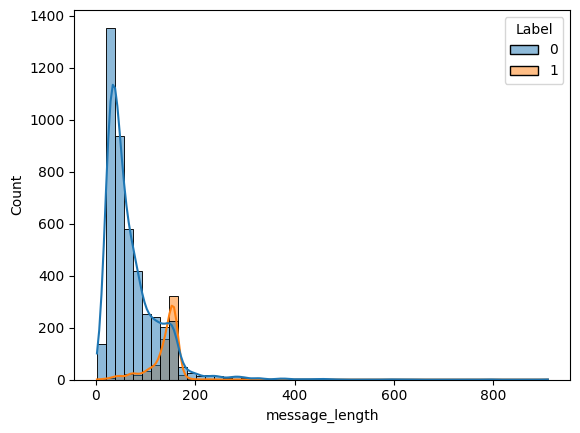

In [127]:
sns.histplot(data=sms,x=sms['message_length'], hue='Label' ,bins=50, kde=True)
plt.show()

In [128]:
sms[sms['Label']==1]['message_length'].describe()    # information of spam msg wrt msg_len  ## generally, spam messages quite longer

count    653.000000
mean     137.891271
std       30.137753
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64

In [129]:
sms[sms['Label']==0]['message_length'].describe()# information of ham msg wrt msg_length

count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: message_length, dtype: float64

<Axes: xlabel='message_length', ylabel='Count'>

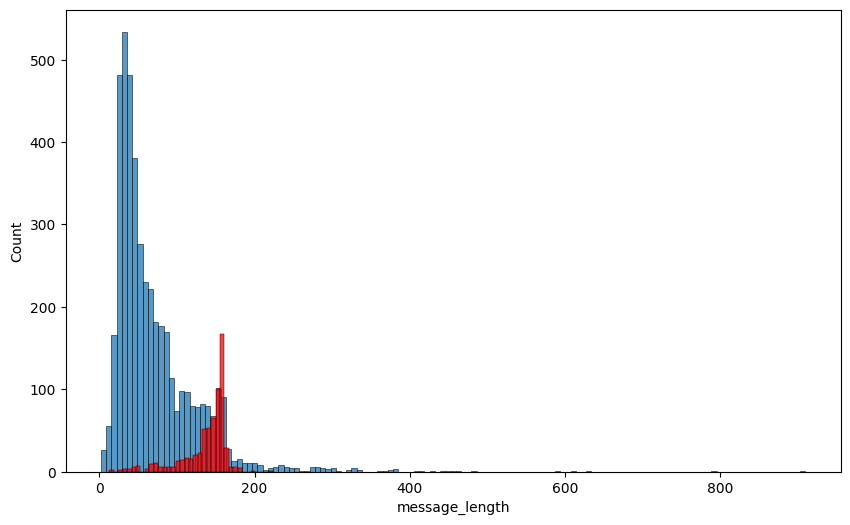

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(sms[sms['Label']==0]['message_length'])
sns.histplot(sms[sms['Label']==1]['message_length'],color='red')


In [131]:
sms[sms['message_length']==910]['message'].iloc[0] ## longest  but not spam

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [132]:
sms[sms['message_length']==244]['message'].iloc[0] ## longer and  spam

"Just so that you know,yetunde hasn't sent money yet. I just sent her a text not to bother sending. So its over, you dont have to involve yourself in anything. I shouldn't have imposed anything on you in the first place so for that, i apologise."

In [134]:
sms[['Label', 'message_length']].corr()

,Label,message_length
Label,1.000000,0.384717
message_length,0.384717,1.000000
